#Going the other way.
By now we have all gotten the memo on how to take a model of position vs time and can obtain a model of the velocity, the acceleration and the even higher models of how the state of motion changes. 

Last year and in general we stop at acceleration because (spoiler alert) as you learned last year forces give us a way to determine acceleration. What is different about this year over last year is that the acceleration may be changing with time in, potentially, a complicated way.  We need to get from this change in the velocity per time to a model for velocity

$$a(t) \equiv \frac{\Delta v}{\Delta t} \overset{?}{\Rightarrow}  v(t)$$

You probably already know where this is going but as with derivatives we don't just want to 'do the math' we want to understand what we are doing.

In [ ]:
#@title *The usual imports...*
import numpy as np
# matplotlib is the tool that will create the graphs
import matplotlib.pyplot as plt

##Adding up the pieces.
I'll just come out and say it. What we want to do is 'undo' a derivative. This part of the calculus is, in fact, the thing Newton and Leibniz most of their work trying to prove.  We will take this fundamental theorem of calculus as a given but we will walk through the basics of why this works.

Let's start with a simple model of v(t)

### Simple velocity model
Consier a car, starting at rest, moving away from a traffic light with the following velocity profile.  (Don't spoil the surprise. Don't open the code section, try to get all the values you need from the graph itself.)

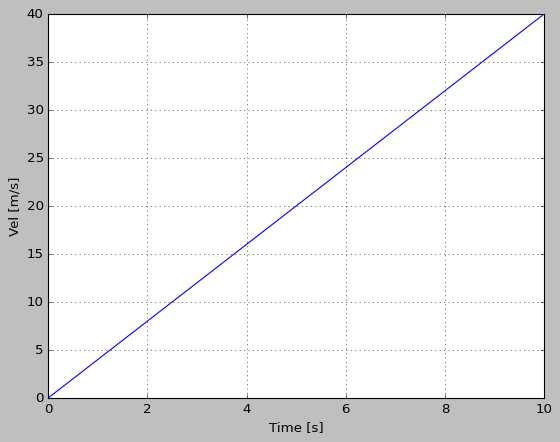

In [ ]:
#@title *Simple velocity model*
def v(t):
  return 4.0 * t

time = np.linspace(0.0, 10.0, 20)
vel = v(time)

plt.style.use('classic')

plt.plot(time, vel)
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Vel [m/s]")
plt.ylim(0,plt.ylim()[1])

plt.show()

From this apparent simple acceleration graph we can deduce the distance covered from time 0 to 6.0sec.  Last year we simply determined the area under the graph from t=0 to t=6.0s. Suppose, though, we wanted a relationship to express what the distance covered is in terms of the end point in time rather than a specific value.  What would you come up with?

Try using geometry to generate an algebraic expression.  (You probably did this last year)

What would be the average velocity in this situation?  Could I use that to determine the distance travelled?  Is this expression different or the same as the expression you got above?


### Lets modify this situation a bit. 
Supose another car comes along already travelling pretty fast and wants to take off when it passes another intersection some distance down the road.

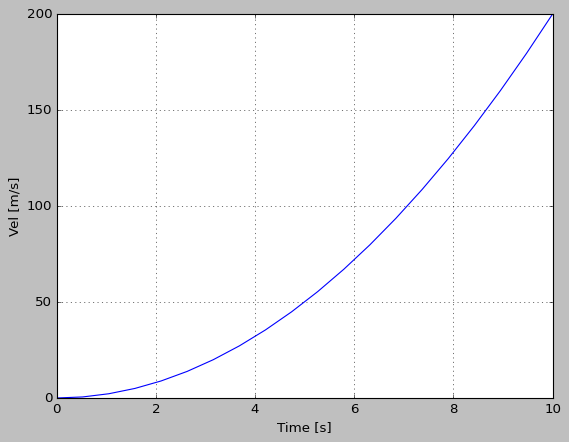

In [ ]:
#@title *Simple velocity model tweaked*
def v(t):
  return 2.0 * t**2 

time = np.linspace(0.0, 10.0, 20)
vel = v(time)

plt.style.use('classic')

plt.plot(time, vel)
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Vel [m/s]")
plt.ylim(0,plt.ylim()[1])

plt.show()

Does the object following this model cover the same distance in the same time as an object following the previous model did?

How does this graph change the expression you got above? 
What would the avearage velocity be affected by this situation?

### Check the results
In the two examples listed above you were asked to deduce an algebraic expression that would generalize your results.  So you should have two expressions that describe the change in position as a function of time. 

Why don't we have the exact position of the cars as function of time?
If you took the derivative of these expressions could you reproduce the graphs you see above?

## Moving from models starting with velocity.

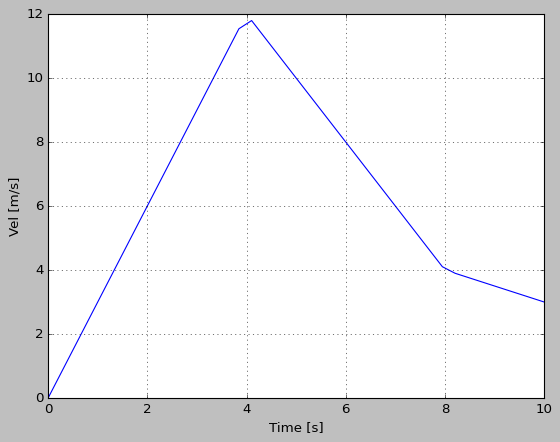

In [ ]:
#@title More interesting examples
def v1(t):
  return 3.0 * t 

def v2(t):
  return -2.0 * t

def v3(t):
  return -0.5 * t


def v(t):
  return np.piecewise(t, [t <= 4.0, t>4.0, t>8.0 ], 
                        [ lambda x: v1(x), lambda x: v(4.0)+v2(x-4), lambda x:v(8)+v3(x-8)])

time = np.linspace(0.0, 10.0, 40)
vel = v(time)

plt.style.use('classic')

plt.plot(time, vel)
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Vel [m/s]")
plt.ylim(0,plt.ylim()[1])

plt.show()

Still pretty straightforward to figure the distance but what if the graph looked like the one below.  This time you can open the tab and play with the number of steps and see if the box counting method matches the skill you have used to work out the distance travelled.

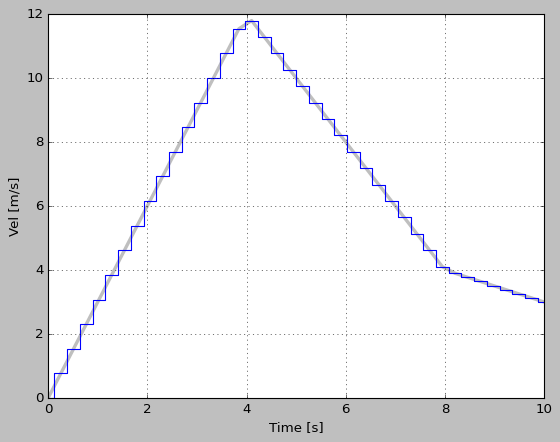

In [ ]:
#@title Baby steps
time = np.linspace(0.0, 10.0, 40)
vel = v(time)

plt.style.use('classic')


plt.plot(time, vel, color='gray', alpha=0.5, linewidth=3.0)

plt.step(time, vel, where='mid')
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Vel [m/s]")
plt.ylim(0,plt.ylim()[1])

plt.show()

## Falling down the rabbit hole

Now for the fun stuff. What would happen if the speed were changing continuously?

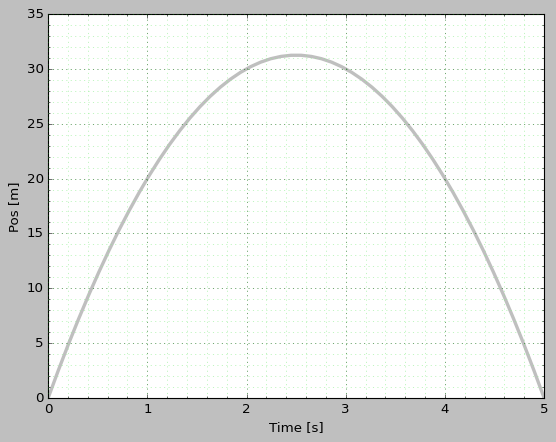

In [ ]:
#@title Getting faster
time = np.linspace(0.0, 5.0, 50)
vel = 25.0-10.0*time
pos = 25.0*time-1/2*10.0*time**2

plt.style.use('classic')


plt.plot(time, pos, color='gray', alpha=0.5, linewidth=3.0)

#plt.step(time, vel, where='mid')
plt.minorticks_on()

plt.grid(True, which='minor', color='lightgreen')
plt.grid(True, which='major', color='darkgreen')

plt.xlabel("Time [s]")
plt.ylabel("Pos [m]")
#plt.ylim(0,plt.ylim()[1])

plt.show()

Count the boxes and estimate the distance. Estimate the distance covered. Based on what we determined in class can you get a better estimate?

## Problem Sets

### Big Boats

A large hydrofoil ship cannot accelerate in the way a car can.  Pushing a massive ferry through the water involves a number of forces that conspire to give the velocity change profile an unusual shape.  For the purpose of our current exploration suppose a particular ship has an acceleration profile in the first 6 minutes of

$$a(t) = -1.46\cdot 10^{-3} \cdot t + \sqrt{773.\cdot 10^{-6} \cdot t}$$

How fast is the ship going at the end of 6 minutes?

How much distance has it covered if it started from rest?

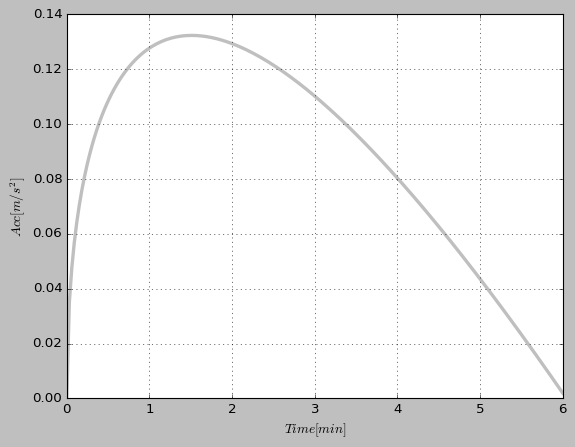

In [ ]:
#@title Getting faster
time = np.linspace(0.0, 6.0*60, 200)
acc =  np.sqrt(773.E-6*time)  - 1.46E-3*time


plt.style.use('classic')


plt.plot(time/60.0, acc, color='gray', alpha=0.5, linewidth=3.0)

#plt.step(time, acc, where='mid')
plt.grid(True)
plt.xlabel("$Time [min]$")
plt.ylabel("$Acc [m/s^2]$")
#plt.ylim(0,plt.ylim()[1])

plt.show()


### Falling past the window

A steel ball is dropped from a building's roof and passes a window, taking $\approx 1/8$ of a second to fall from the top to the bottom of the $1.20m$ window. In odd turn of events $2.00s$ later it hits a hard surface and bounces back travelling upward from the bottom to the top in the same amount of time.

How tall is the building?


### Slowing down

A car passes a sign moving at $20.0 {m \over s}$ it travels for $100. m$ at constant velocity to a yield sign and slows down at a constant rate stopping at an intersection $30.0m$ further down the road.
 - How long does this whole process take?
 - What was the acceleration of the car from the time it passes the yield sign until it stops.
 - What was the overall average acceleration from the beginning?
 - What was the average speed?

### More trouble

In this problem points A, B, and C lie in along a straight line.


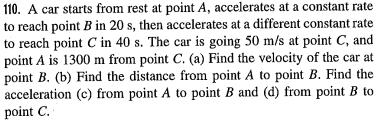)